# Project Instructions:
1. Pick a dataset.
2. Pose at least three questions related to business or real-world applications of how the data could be used.
3. Create a Jupyter Notebook, using any associated packages you'd like, to:
    - Prepare data:
        - Gather necessary data to answer your questions
        - Handle categorical and missing data
        - Provide insight into the methods you chose and why you chose them
    - Analyze, Model, and Visualize
        - Provide a clear connection between your business questions and how the data answers them.
4. Communicate your business insights:
    - Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    - Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post.

# 0. Importing libs and functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importing datasets
- the datasets were individually downloaded from https://www.kaggle.com/airbnb/seattle/data and https://www.kaggle.com/airbnb/boston
- the zip files were extracted to respective folders

#### 1.1. Importing calendar datasets:

In [2]:
boston_calendar = pd.read_csv('boston/calendar.csv')\
                    .assign(city = 'boston')

seattle_calendar = pd.read_csv('seattle/calendar.csv')\
                    .assign(city = 'seattle')

calendar = pd.concat([boston_calendar, seattle_calendar], axis = 0)

#### 1.2. Importing listings datasets:

In [3]:
boston_listings = pd.read_csv('boston/listings.csv')\
                    .assign(city = 'boston')

seattle_listings = pd.read_csv('seattle/listings.csv')\
                    .assign(city = 'seattle')

listings = pd.concat([boston_listings, seattle_listings], axis = 0)

#### 1.3. Importing reviews datasets:

In [4]:
boston_reviews = pd.read_csv('boston/reviews.csv')\
                    .assign(city = 'boston')

seattle_reviews = pd.read_csv('seattle/reviews.csv')\
                    .assign(city = 'seattle')

reviews = pd.concat([boston_reviews, seattle_reviews], axis = 0)

# 2. Checking datasets and posing questions:

#### 2.1. Checking `calendar` dataset:

In [5]:
calendar.head()

# the dataset presents data about the availability of listings in historical dates

,listing_id,date,available,price,city
0,12147973,2017-09-05,f,NaN,boston
1,12147973,2017-09-04,f,NaN,boston
2,12147973,2017-09-03,f,NaN,boston
3,12147973,2017-09-02,f,NaN,boston
4,12147973,2017-09-01,f,NaN,boston


#### 2.2. Checking `listings` dataset:

In [6]:
pd.set_option('display.max_columns', 100)
listings.head(3)

# dataset brings lots of columns about the host and about the listing itself

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, Un

#### 2.3. Checking `reviews` dataset:

In [7]:
reviews.head()

# the dataset presents historical data about users' review for listings, with comments

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,boston
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,boston
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,boston
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,boston
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,boston


# 3. Wrangling datasets in order to answer posed questions:
- 3.1. For similar listings, when considering property_type, room_type, accomodates and eventually other columns, how do prices in Boston and Seattle compare?
- 3.2. Do older hosts present higher review scores than newer hosts, on average?
- 3.3. For similar listings, when considering property_type, room_type, accomodates and other columns, are superhosts more successful than non superhosts?

## 3.1. For similar listings, when considering property_type, room_type, accomodates and other columns, how do prices in Boston and Seattle compare?

#### 3.1.1. Checking available values for each of the columns:

In [8]:
# property_type:
print(listings.property_type.value_counts()) # the vast majority of property_type are Apartment and House

Apartment          4320
House              2295
Condominium         322
Townhouse           172
Loft                 79
Bed & Breakfast      78
Other                39
Cabin                21
Boat                 20
Camper/RV            14
Bungalow             13
Villa                 6
Tent                  5
Entire Floor          4
Dorm                  4
Treehouse             3
Chalet                2
Yurt                  1
Guesthouse            1
Name: property_type, dtype: int64


In [9]:
# room_type:
print(listings.room_type.value_counts()) 

Entire home/apt    4668
Private room       2538
Shared room         197
Name: room_type, dtype: int64


In [10]:
# accommodates:
print(listings.accommodates.value_counts().sort_index())

1      695
2     3110
3      826
4     1435
5      429
6      535
7       91
8      174
9       23
10      44
11       7
12      20
14       6
15       2
16       6
Name: accommodates, dtype: int64


In [11]:
# bathrooms:
print(listings.bathrooms.value_counts().sort_index())

0.0      21
0.5      38
1.0    5633
1.5     456
2.0     851
2.5     192
3.0      85
3.5      70
4.0      10
4.5       4
5.0       7
6.0       4
8.0       2
Name: bathrooms, dtype: int64


In [12]:
# bedrooms:
print(listings.bedrooms.value_counts().sort_index())

0.0     659
1.0    4796
2.0    1333
3.0     438
4.0     114
5.0      40
6.0       6
7.0       1
Name: bedrooms, dtype: int64


In [13]:
# beds:
print(listings.beds.value_counts().sort_index())

0.0        4
1.0     4366
2.0     1865
3.0      708
4.0      258
5.0      113
6.0       37
7.0       22
8.0       10
9.0        6
10.0       2
15.0       1
16.0       1
Name: beds, dtype: int64


In [14]:
# beds:
print(listings.bed_type.value_counts().sort_index()) 

# since the vast majority is 'Real Bed', I won't consider this column for the comparison

Airbed             67
Couch              23
Futon             125
Pull-out Sofa      78
Real Bed         7110
Name: bed_type, dtype: int64


#### 3.1.2. Treating price columns:
- `price`, `weekly_price`, `monthly_price`

In [15]:
# printing in order to check:
print(listings[['price', 'weekly_price', 'monthly_price']])

# removing $ and , is needed

        price weekly_price monthly_price
0     $250.00          NaN           NaN
1      $65.00      $400.00           NaN
2      $65.00      $395.00     $1,350.00
3      $75.00          NaN           NaN
4      $79.00          NaN           NaN
...       ...          ...           ...
3813  $359.00          NaN           NaN
3814   $79.00          NaN           NaN
3815   $93.00      $450.00           NaN
3816   $99.00          NaN           NaN
3817   $87.00          NaN           NaN

[7403 rows x 3 columns]


In [16]:
# price:
listings.price = listings.price.str.replace(',', '')
listings.price = listings.price.str.replace('$', '')
listings.price = listings.price.astype(float)

# weekly price:
listings.weekly_price = listings.weekly_price.str.replace(',', '')
listings.weekly_price = listings.weekly_price.str.replace('$', '')
listings.weekly_price = listings.weekly_price.astype(float)

# monthly price:
listings.monthly_price = listings.monthly_price.str.replace(',', '')
listings.monthly_price = listings.monthly_price.str.replace('$', '')
listings.monthly_price = listings.monthly_price.astype(float)

In [17]:
# printing again and checking:
print(listings[['price', 'weekly_price', 'monthly_price']])

      price  weekly_price  monthly_price
0     250.0           NaN            NaN
1      65.0         400.0            NaN
2      65.0         395.0         1350.0
3      75.0           NaN            NaN
4      79.0           NaN            NaN
...     ...           ...            ...
3813  359.0           NaN            NaN
3814   79.0           NaN            NaN
3815   93.0         450.0            NaN
3816   99.0           NaN            NaN
3817   87.0           NaN            NaN

[7403 rows x 3 columns]


#### 3.1.3. Function which will perform pivot operation and compare price columns between Boston and Seattle:

In [18]:
def pivot_price_boston_seattle(df, group_columns, price_column, aggfunc = 'median'):
    '''
    Summary:
    Returns df grouped by group_columns, pivoted by 'city' (for Boston and Seattle), 
    with aggregated values as aggfunc of price_column. After pivoting, the dataframe's index is reseted, 
    NAs are dropped, and a column named 'seattle_over_boston' is created by dividing Seattle values by Boston values.
    NAs need to dropped after pivoting, for cases where a given set of the group_columns exist for one of the cities,
    but not for the other.

    Parameters:
    df (pandas dataframe): the dataframe one wishes to transform.
    group_columns (list): list of column names which need to be grouped before pivoting 'city'.
    price_column (string): df's column name whose values will be aggregated by median.
    aggfunc (string): aggregate function used to aggregate price_column. The standard aggregation is 'median'.

    Returns:
    pandas dataframe: df wrangled as described in the function's summary.
    '''
    df_pivoted = pd.pivot_table(data = df,
                                index = group_columns,
                                columns = 'city',
                                values = price_column,
                                aggfunc = aggfunc
                               )\
                    .reset_index()\
                    .dropna()
    #
    df_pivoted['seattle_over_boston'] = df_pivoted['seattle'] / df_pivoted['boston']
    #
    return df_pivoted

#### 3.1.4. Comparing `price` column:

In [19]:
# performing analysis for daily price (price column):
boston_seattle_price = pivot_price_boston_seattle(df = listings,
                                 group_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms'],
                                 price_column = 'price')

In [20]:
# general ratio for price between seattle and boston:
print(boston_seattle_price.seattle_over_boston.median())
print(boston_seattle_price.seattle_over_boston.mean())

# that is, seattle prices are ~75% of boston prices (median of median values), or ~85% (average of median values)
# the high difference between median and mean indicates that there are outliers

0.7525
0.855156085268077


In [21]:
# setting option so it's possible to see all columns side to side:
pd.set_option('display.width', 1000)

In [22]:
print(boston_seattle_price.sort_values(by = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']))

# by checking the paired comparisons between boston and seattle, 
# there seems at first to be no clear tendency, like - when raising accomodates, the ratio increases... 
# the values are concentrated around 0.4 - 0.7, and there are some outliers
# to check the distribution, the best approach will be to plot a histogram

city property_type        room_type  accommodates  bathrooms  bedrooms  boston  seattle  seattle_over_boston
0        Apartment  Entire home/apt             1        1.0       0.0   120.0     54.0             0.450000
1        Apartment  Entire home/apt             1        1.0       1.0   142.0     75.0             0.528169
4        Apartment  Entire home/apt             2        1.0       0.0   150.0     98.0             0.653333
5        Apartment  Entire home/apt             2        1.0       1.0   179.0    110.0             0.614525
6        Apartment  Entire home/apt             2        1.0       2.0   148.0    187.5             1.266892
..             ...              ...           ...        ...       ...     ...      ...                  ...
534      Townhouse     Private room             2        1.0       1.0    88.0     69.0             0.784091
535      Townhouse     Private room             2        1.5       1.0    84.0     70.0             0.833333
536      Townhouse 

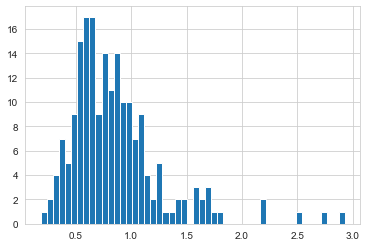

In [23]:
# plotting a histogram in order to check the distribution of the average median ratio between Seattle and Boston's prices,
# for similar listings
sns.set_style("whitegrid")
boston_seattle_price.seattle_over_boston.hist(bins = 50)

#### 3.1.5. Comparing `weekly_price` column:

In [24]:
# performing analysis for weekly price (weekly_price column):
boston_seattle_weekly_price = pivot_price_boston_seattle(df = listings,
                                 group_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms'],
                                 price_column = 'weekly_price')

In [25]:
# general ratio for weekly_price between seattle and boston:
print(boston_seattle_weekly_price.seattle_over_boston.median())
print(boston_seattle_weekly_price.seattle_over_boston.mean())

# that is, seattle weekly prices are ~81% of boston weekly prices (median of median values), or ~88% (average of median values)

0.8101248799231509
0.8848080148176217


In [26]:
# in fact, calculating the average increase from price to weekly_price in Boston and Seattle... in Seattle it's higher!
listings['weekly_price_increase'] = listings['weekly_price'] / listings['price']

# dropping NAs in order to make calculations only for listings where a weekly price is available
print(listings.dropna(subset = ['weekly_price_increase'], how = 'any').groupby('city').weekly_price_increase.median())

city
boston     6.140351
seattle    6.333333
Name: weekly_price_increase, dtype: float64


#### 3.1.6. Comparing `monthly_price` column:

In [27]:
# performing analysis for monthly price (monthly_price column):
boston_seattle_monthly_price = pivot_price_boston_seattle(df = listings,
                                 group_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms'],
                                 price_column = 'monthly_price')

In [28]:
# general ratio for monthly_price between seattle and boston:
print(boston_seattle_monthly_price.seattle_over_boston.median())
print(boston_seattle_monthly_price.seattle_over_boston.mean())

# that is, seattle prices are ~87% of boston prices (median of median values), or ~92% (average of median values)

0.875
0.925414531123475


In [29]:
# in fact, calculating the average increase from price to monthly_price in Boston and Seattle... in Seattle it's higher!
listings['monthly_price_increase'] = listings['monthly_price'] / listings['price']

# dropping NAs in order to make calculations only for listings where a monthly price is available
print(listings.dropna(subset = ['monthly_price_increase'], how = 'any').groupby('city').monthly_price_increase.median())

city
boston     20.909091
seattle    21.428571
Name: monthly_price_increase, dtype: float64


#### 3.1.7. Conclusions - price comparison between Boston and Seattle:
- in general, Seattle presents lower prices than Boston - there are some outliers, but the ratio values are concentrated around 0.5 to 0.8
- however, Seattle hosts increase more the listing's price, proportionally, than Boston hosts - these ratios become higher when weekly prices or monthly prices are compared, and the median prices get closer

## 3.2. Do older hosts present higher review scores than newer hosts, on average?

#### 3.2.1. Converting `host_since` to dates, and creating auxiliary column to get host 'age' in Airbnb:

In [30]:
# converting to datetime:
listings.host_since = pd.to_datetime(listings.host_since)

In [31]:
# creating auxiliary column which will enable calculation of 'host age':
listings['max_date_df'] = listings.host_since.max()

In [32]:
# creating 'host_age' column:
listings['host_age'] = (listings['max_date_df'] - listings['host_since']).dt.days

In [33]:
# taking a look at host_age column:
print(listings.host_age.head())

0     510.0
1    1552.0
2    2675.0
3    1234.0
4     849.0
Name: host_age, dtype: float64


#### 3.2.2. Checking if any plots could bring insights into relation between `host_age` and review scores:

In [34]:
# bucketing host_age using qcut:
listings['host_age_qcut'] = pd.qcut(listings.host_age, 20, labels = range(20))

In [35]:
# checking intervals for each qcut label:
print(listings.groupby('host_age_qcut').host_age.agg({'min', 'max'}))

                  min     max
host_age_qcut                
0                 0.0   208.0
1               211.0   323.0
2               324.0   391.0
3               392.0   455.0
4               456.0   523.0
5               524.0   578.0
6               579.0   658.0
7               659.0   734.0
8               735.0   789.0
9               790.0   866.0
10              867.0   954.0
11              955.0  1058.0
12             1059.0  1139.0
13             1140.0  1248.0
14             1250.0  1367.0
15             1369.0  1506.0
16             1507.0  1672.0
17             1673.0  1867.0
18             1868.0  2162.0
19             2170.0  2857.0


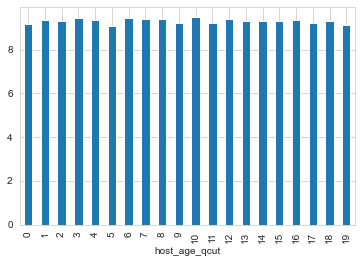

In [36]:
# plotting review scores and qcut labels:
median_review_value_host_age_qcut = listings.groupby('host_age_qcut').review_scores_value.mean()

median_review_value_host_age_qcut.plot(kind = 'bar')

#### 3.2.3. Conclusion - Host age and reviews:
- there is no clear relationship between host_age and average review scores
- unfortunately, it was not possible to perform an analysis wheter a given host tends to increase its review score with time, since we only have the average value for review_score

## 3.3. For similar listings, when considering property_type, room_type, accomodates and other columns, are superhosts more successful than non superhosts?
- what does it mean to be successful in Airbnb?
    - maybe being able to charge higher prices, given the same conditions?
    - or maybe receiving better reviews, given the same conditions?
- as we'll be comparing 'similar conditions', codes from section 3.1 may be reused - actually, the same grouping columns will be kept
- a very similar function as the one from 3.1.3 may be coded, pivoting the `host_is_superhost` column, instead of `city`

#### 3.3.1. Checking columns which will be used and were not verified yet in this notebook:

In [37]:
# checking the `host_is_superhost` column:
listings.host_is_superhost.value_counts()

f    6216
t    1185
Name: host_is_superhost, dtype: int64

#### 3.3.2. Function which will perform pivot operation and compare prices and reviews between superhost and non superhosts:
- code is very similar to the function in 3.1.3: `pivot_price_boston_seattle` - the following function is more generic and would serve more purposes than the one defined in 3.1.3.

In [38]:
def df_group_pivot(df, group_columns, pivot_column, value_column, aggfunc = 'median'):
    '''
    Summary:
    Returns df grouped by group_columns, pivoted by pivot_column, with aggregated values as
    aggfunc of value_column. After pivoting, the dataframe's index is reseted and NAs are dropped.
    NAs need to dropped after pivoting, for cases where a given set of the group_columns do not exist for all
    possible values from pivot_column.

    Parameters:
    df (pandas dataframe): the dataframe one wishes to transform.
    group_columns (list): list of column names which need to be grouped before pivoting.
    pivot_column (string): df's column name which will be pivoted using pandas.pivot_table.
    value_column (string): df's column name whose values will be aggregated by aggfunc.
    aggfunc (string): aggregate function used to aggregate value_column. The standard aggregation is 'median'.

    Returns:
    pandas dataframe: df wrangled as described in the function's summary.
    '''
    df_pivoted = pd.pivot_table(data = df,
                                index = group_columns,
                                columns = pivot_column,
                                values = value_column,
                                aggfunc = aggfunc
                               )\
                    .reset_index()\
                    .dropna()
    #
    return df_pivoted

#### 3.3.3. Comparing `price` column between superhost and non superhosts:

In [39]:
superhost_price = df_group_pivot(df = listings,
                                 group_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms'],
                                 pivot_column = 'host_is_superhost',
                                 value_column = 'price')
# 
superhost_price['superhost_over_nonsuper'] = superhost_price['t'] / superhost_price['f']

In [40]:
superhost_price.head(3)

host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,f,t,superhost_over_nonsuper
4,Apartment,Entire home/apt,2,1.0,0.0,120.0,105.0,0.875000
5,Apartment,Entire home/apt,2,1.0,1.0,139.0,128.0,0.920863
6,Apartment,Entire home/apt,2,1.0,2.0,187.5,106.5,0.568000


In [41]:
# general ratio for price between superhosts and non superhosts:
print(superhost_price.superhost_over_nonsuper.median())
print(superhost_price.superhost_over_nonsuper.mean())

# that is, superhost prices are ~102% of non superhost prices (median of median values), or ~112% (average of median values)
# the high difference between median and mean indicates that there are outliers

1.0154241645244215
1.117736159837437


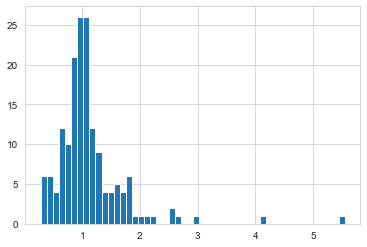

In [42]:
# plotting histogram in order to check ratio's distribution:
sns.set_style("whitegrid")
superhost_price.superhost_over_nonsuper.hist(bins = 50)

# the distribution actually seems to be concentrated around 1.0, with some outliers to the right, which results
# in a higher value for the average, when compared to the median

#### 3.3.4. Comparing `review_scores_value` column between superhost and non superhosts:

In [43]:
superhost_review = df_group_pivot(df = listings,
                                 group_columns = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms'],
                                 pivot_column = 'host_is_superhost',
                                 value_column = 'review_scores_value')

superhost_review['superhost_over_nonsuper'] = superhost_review['t'] / superhost_review['f']

In [44]:
superhost_review.head(3)

host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,f,t,superhost_over_nonsuper
2,Apartment,Entire home/apt,2,1.0,0.0,9.0,10.0,1.111111
3,Apartment,Entire home/apt,2,1.0,1.0,9.0,10.0,1.111111
4,Apartment,Entire home/apt,2,1.0,2.0,9.0,10.0,1.111111


In [45]:
# general ratio for review scores between superhosts and non superhosts:
print(superhost_review.superhost_over_nonsuper.median())
print(superhost_review.superhost_over_nonsuper.mean())

# that is, superhost review scores are ~105% of non superhosts' (median of median values or mean of median values)
# the similarity between median and mean indicates that there aren't many outliers, probably because scores are a set of discrete values - 9.0 and 10., for example

1.0526315789473684
1.0525937376750079


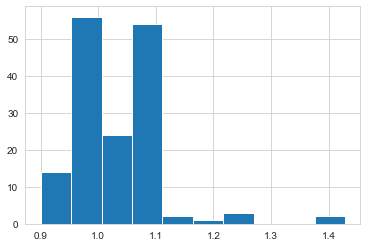

In [46]:
# plotting histogram:
sns.set_style("whitegrid")
superhost_review.superhost_over_nonsuper.hist(bins = 10)

# the distribution is concentrated around 0.9 ~ 1.1, with more values to the right, besides some outliers outliers greater than 1.0

#### 3.3.5. Conclusion - Superhost and its relation to price and review scores:
- superhosts practice slighly higher prices, on average (considering both Boston and Seattle). These higher prices, however, are due mostly to some outliers, that is, it seems that people who practice really high prices are, in general, superhosts.
- superhosts have slightly higher review scores - the distribution of the ratios between scores (superhost over non-superhost) is concetrated around 0.9 ~ 1.0, with median and average values equal to ~1.05.